Font: https://summer-hu-92978.medium.com/complete-feature-selection-techniques-4-1-statistical-test-analysis-611ede242fa0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import feature_selection as fs

In [2]:
train_df = pd.read_csv('titanic.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df = train_df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

In [6]:
# Change the categorical feature value into numeric value
sex_map = {'male': 0, 'female': 1}
train_df['Sex'] = train_df['Sex'].map(sex_map)

In [7]:
embarked_map = {'C': 0, 'Q': 1, 'S': 2}
train_df['Embarked'] = train_df['Embarked'].map(embarked_map)

In [8]:
# Add a random feature to verify MI
train_df['Random'] = np.random.randint(1, 5, train_df.shape[0])

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Random
0,0,3,0,22.0,7.2500,2.0,3
1,1,1,1,38.0,71.2833,0.0,1
2,1,3,1,26.0,7.9250,2.0,1
3,1,1,1,35.0,53.1000,2.0,3
4,0,3,0,35.0,8.0500,2.0,3
5,0,3,0,NaN,8.4583,1.0,4
6,0,1,0,54.0,51.8625,2.0,2
7,0,3,0,2.0,21.0750,2.0,1
8,1,3,1,27.0,11.1333,2.0,1
9,1,2,1,14.0,30.0708,0.0,2


In [13]:
train_df.dropna(inplace=True)

In [24]:
data = train_df.drop("Survived", axis=1)
target = train_df["Survived"].values

In [25]:
# Estimate mutual information for a discrete target variable.
mi_score = fs.mutual_info_classif(
    data, 
    target, 
    n_neighbors=10, # Number of neighbors to use for MI estimation for continuous variables
    random_state=22)

In [26]:
sorted_idx = np.argsort(mi_score)
print(sorted_idx)
print(sorted(list(mi_score)))

[5 2 4 0 3 1]
[0.0, 0.02277426018531914, 0.023630214059539245, 0.0546487712572179, 0.08421315775051763, 0.1490875696569378]


In [27]:
mi_score_df = pd.DataFrame(
    mi_score[sorted_idx[::-1]], 
    index=data.columns[sorted_idx[::-1]], 
    columns=['mi_score'])

In [28]:
mi_score_df

,mi_score
Sex,0.149088
Fare,0.084213
Pclass,0.054649
Embarked,0.023630
Age,0.022774
Random,0.000000


Text(0.5, 0, 'Mutual Information Score')

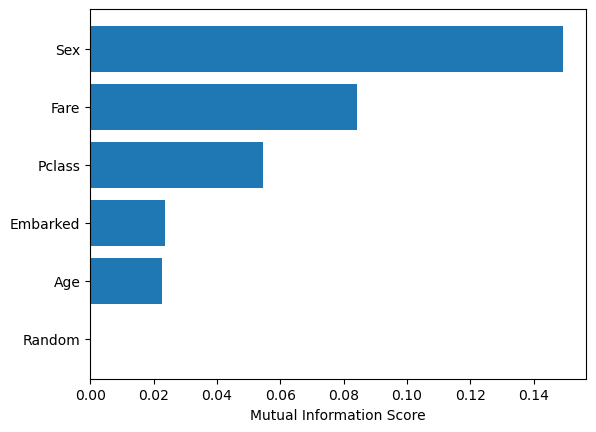

In [29]:
plt.barh(
    data.columns[sorted_idx], 
    mi_score[sorted_idx])
plt.xlabel("Mutual Information Score")